# **Medical Cost Personal EDA & Predictions**
---


## **Background**

Health insurance companies use various factors to determine the cost of coverage for an individual. Understanding these factors and their relationships can help in making informed decisions, setting appropriate insurance premiums, and identifying patterns that contribute to higher or lower medical costs.

## **Objectives**

1. **Exploratory Data Analysis (EDA):**
   - Understand data distributions and patterns.
   - Explore relationships between attributes.
   - Identify outliers and anomalies.

2. **Predictive Modeling:**
   - Build regression models for medical cost predictions.
   - Evaluate model performance and accuracy.
   - Identify key factors influencing medical costs.

3. **Feature Importance Analysis:**
   - Assess the significance of each attribute in predicting costs.
   - Determine the most influential factors.

4. **Practical Application:**
   - Explore the potential deployment of the model.
   - Consider real-world implications and limitations.
   - Summarize findings in a comprehensive report.

## **Attribute information**




* **`age`**: age of primary beneficiary (years)
* **`sex`**: insurance contractor gender, female, male
* **`bmi`**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **`children`**: Number of children covered by health insurance / Number of dependents
* **`smoker`**: Smoking
* **`region`**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **`charges`**: Individual medical costs billed by health insurance

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

sns.set(style='whitegrid', context='notebook')

Mounted at /content/drive


## **Data Loading**

In [ ]:
medical_cost_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Platzi/db/insurance.csv')
medical_cost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(f'Shape of the dataset is: {medical_cost_df.shape}\n')
medical_cost_df.info()

Shape of the dataset is: (1338, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that dataset have:

*   Four numerical variables ***(age, bmi, children & charges)***.
*   Tree categorical variables ***(sex, smoker, region)***.

For categorical variables we should do an **OHE (One-Hot-Encode)** and for numerical **descriptive staticstics**.



Next, we are going to identify duplicated data.

In [ ]:
print(f'Total number of duplicates entities: {medical_cost_df.duplicated().sum()}')
medical_cost_df[medical_cost_df.duplicated(keep=False)]

Total number of duplicates entities: 1


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


If duplicate data exists in the dataset, it can cause bias in analysis and modeling. Duplicated data does not provide useful information.

In [ ]:
medical_cost_df.drop_duplicates(inplace=True)
print(f'Total number of duplicates entities: {medical_cost_df.duplicated().sum()}')

Total number of duplicates entities: 0


Now we identify `NaN` data inside the features of the dataset.

In [ ]:
medical_cost_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Description of dataset**

In [ ]:
medical_cost_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## **Relation between the features**

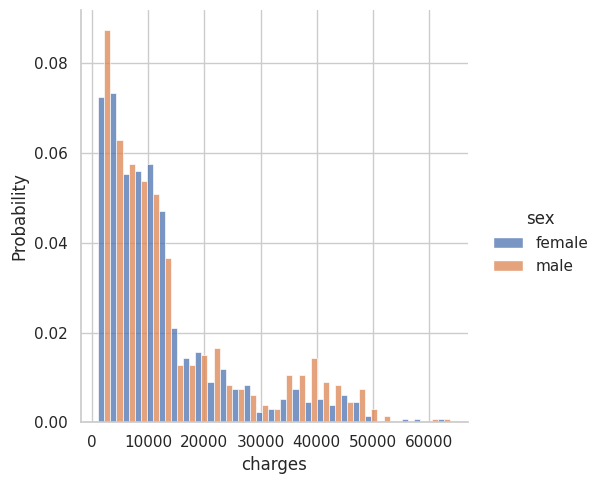

In [ ]:
sns.displot(data=medical_cost_df, x='charges', kind='hist', hue='sex', multiple='dodge', stat='probability')
plt.show()

The plot shows the charges probability related with the sex. We can see that above 50000 the charges are already few.

In [ ]:
medical_cost_df[medical_cost_df['charges'] > 50000].count()

age         7
sex         7
bmi         7
children    7
smoker      7
region      7
charges     7
dtype: int64

There are 7 people with charges above 50000

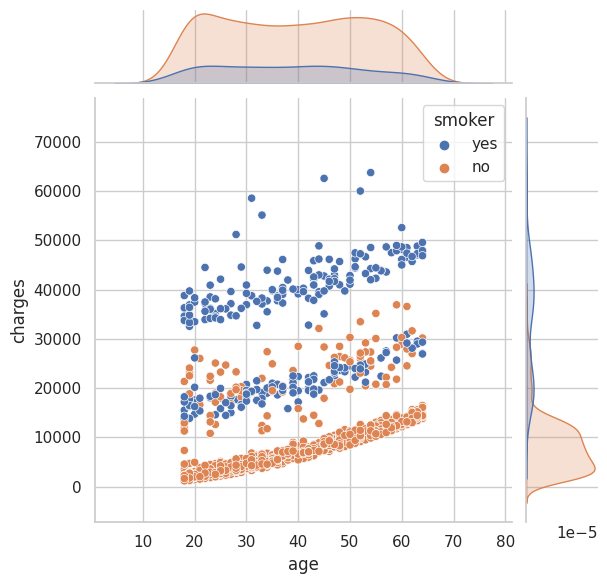

In [ ]:
sns.jointplot(data=medical_cost_df, x='age', y='charges', hue='smoker', kind='scatter')
plt.show()

The plot shows the relation between the age and charges, we can see that people with less than 20000 charges are mostly no smoker.

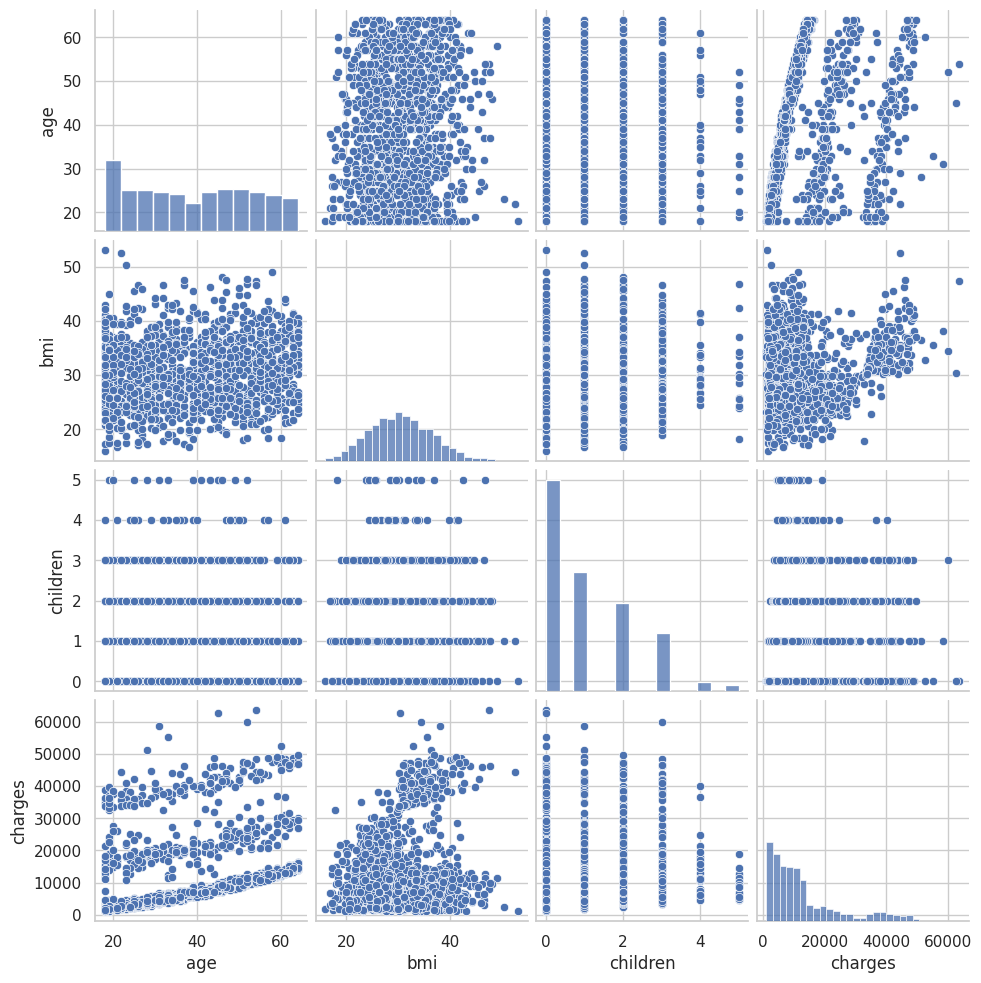

In [ ]:
features = ['age',	'bmi',	'children',	'charges']
sns.pairplot(data=medical_cost_df[features])
plt.show()

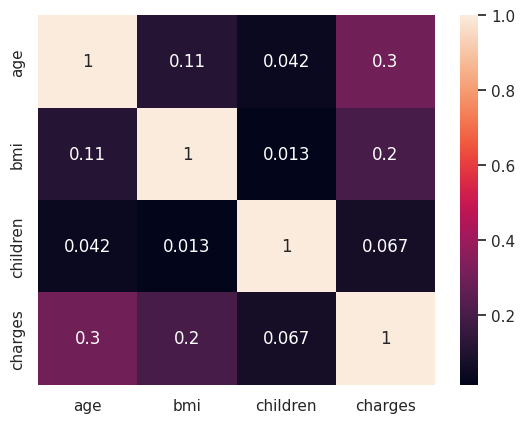

In [ ]:
sns.heatmap(data=medical_cost_df[features].corr(), annot=True)
plt.show()

In [ ]:
medical_cost_df = pd.get_dummies(medical_cost_df, ['sex', 'smoker', 'region'], drop_first=True)
medical_cost_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

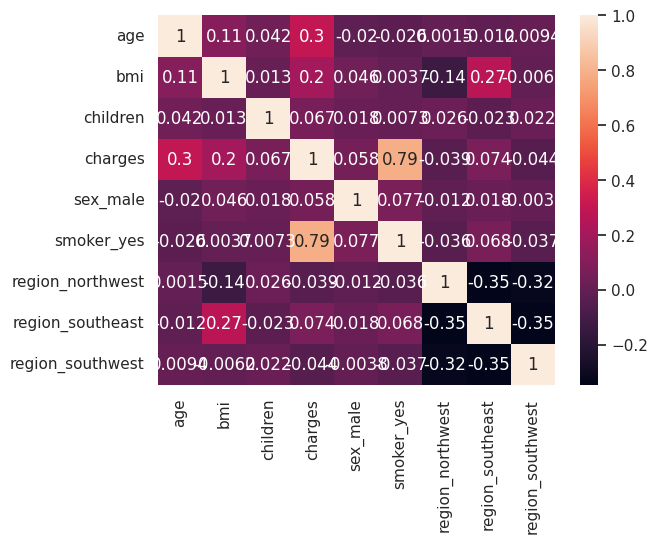

In [ ]:
sns.heatmap(data=medical_cost_df.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_features = list(set(medical_cost_df.columns)-set(['charges']))
Y_features = ['charges']

print(X_features)

X = medical_cost_df[X_features].values
Y = medical_cost_df[Y_features].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

sc_X = StandardScaler().fit(X)
sc_Y = StandardScaler().fit(Y)

X_train_std = sc_X.transform(X_train)
X_test_std = sc_X.transform(X_test)
Y_train_std = sc_Y.transform(Y_train)
Y_test_std = sc_Y.transform(Y_test)

model = LinearRegression()
model.fit(X_train_std, Y_train_std)

Y_pred = model.predict(X_test_std)
print(Y_pred.shape)

['region_southeast', 'bmi', 'region_northwest', 'age', 'region_southwest', 'sex_male', 'children', 'smoker_yes']
(335, 1)


In [ ]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(Y_test_std, Y_pred)
r2 = metrics.r2_score(Y_test_std, Y_pred)
print(f'MSE: {mse.round(4)}\t R2: {r2.round(4)}')

MSE: 0.2541	 R2: 0.7474


In [ ]:
!pip install git+https://github.com/nsh87/regressors.git@3a39e6aeb09953ccaeabec346f2eef324b7fcab9

  Cloning https://github.com/nsh87/regressors.git (to revision 3a39e6aeb09953ccaeabec346f2eef324b7fcab9) to /tmp/pip-req-build-84cf1_v6
  Running command git clone --filter=blob:none --quiet https://github.com/nsh87/regressors.git /tmp/pip-req-build-84cf1_v6
  Running command git rev-parse -q --verify 'sha^3a39e6aeb09953ccaeabec346f2eef324b7fcab9'
  Running command git fetch -q https://github.com/nsh87/regressors.git 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Running command git checkout -q 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Resolved https://github.com/nsh87/regressors.git to commit 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12365 sha256=22907e48c55c03a4948c34f3fd57f2bfff47f75e96e3c6f7f2f7f4f70119c8e1
  Stored in directory: /root/.cache/pip/wheels/d3/da/37/899d58bc99cfb7eff4c622acf717bdec6050644ebba5bcd69e
Successfully built regressors


In [ ]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
Y_test_std = Y_test_std.reshape(-1)
print(Y_test_std.shape, X_test_std.shape)
print('================ Summary ================')
stats.summary(model, X_test_std, Y_test_std, X_features)

(335,) (335, 8)
================ Summary ================
Residuals:
    Min     1Q  Median     3Q    Max
-1.9762 -0.088  0.0813 0.2408 0.9386


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.007799    0.027878   0.2797  0.779848
region_southeast -0.035215    0.032333  -1.0891  0.276877
bmi               0.167698    0.028217   5.9431  0.000000
region_northwest -0.009918    0.033018  -0.3004  0.764068
age               0.297040    0.026678  11.1341  0.000000
region_southwest -0.031583    0.033112  -0.9538  0.340852
sex_male         -0.003835    0.027701  -0.1384  0.889968
children          0.047691    0.028108   1.6967  0.090687
smoker_yes        0.804565    0.026415  30.4581  0.000000
---
R-squared:  0.74738,    Adjusted R-squared:  0.74119
F-statistic: 120.56 on 8 features


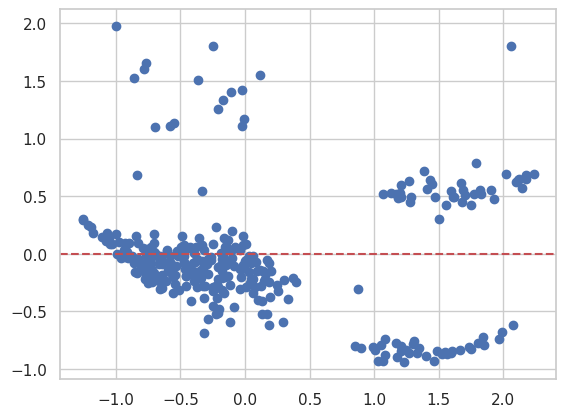

In [ ]:
residuals = np.subtract(Y_test_std, Y_pred.reshape(-1))

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
imp_medical_cost_df = medical_cost_df.copy()
imp_medical_cost_df['age2'] = imp_medical_cost_df.age**2
imp_medical_cost_df['overweight'] = (imp_medical_cost_df['bmi'] >= 30).astype(int)
imp_medical_cost_df['owbysmok'] = imp_medical_cost_df.smoker_yes*imp_medical_cost_df.overweight
imp_medical_cost_df.head()
imp_medical_cost_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Platzi/db/insurance_ext.csv', index=False)

In [ ]:
X_features = list(set(imp_medical_cost_df.columns)-set(['charges']))
Y_features = ['charges']

print(X_features)

X = imp_medical_cost_df[X_features].values
Y = imp_medical_cost_df[Y_features].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

sc_X = StandardScaler().fit(X)
sc_Y = StandardScaler().fit(Y)

X_train_std = sc_X.transform(X_train)
X_test_std = sc_X.transform(X_test)
Y_train_std = sc_Y.transform(Y_train)
Y_test_std = sc_Y.transform(Y_test)

model = LinearRegression()
model.fit(X_train_std, Y_train_std)

Y_pred = model.predict(X_test_std)
print(Y_pred.shape)

['region_southeast', 'overweight', 'bmi', 'owbysmok', 'region_northwest', 'age', 'region_southwest', 'sex_male', 'children', 'age2', 'smoker_yes']
(335, 1)


In [ ]:
mse = metrics.mean_squared_error(Y_test_std, Y_pred)
r2 = metrics.r2_score(Y_test_std, Y_pred)
print(f'MSE: {mse.round(4)}\t R2: {r2.round(4)}')

MSE: 0.1139	 R2: 0.8552


In [ ]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
Y_test_std = Y_test_std.reshape(-1)
print(Y_test_std.shape, X_test_std.shape)
print('================ Summary ================')
stats.summary(model, X_test_std, Y_test_std, X_features)

(335,) (335, 11)
================ Summary ================
Residuals:
    Min     1Q  Median     3Q    Max
-1.5924 0.0764  0.1153 0.1515 0.3416


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.006653    0.018680   0.3562  0.721932
region_southeast -0.031936    0.022929  -1.3928  0.164594
overweight       -0.042228    0.029334  -1.4395  0.150934
bmi               0.065620    0.029039   2.2597  0.024482
owbysmok          0.506932    0.028536  17.7649  0.000000
region_northwest -0.015685    0.020093  -0.7806  0.435591
age              -0.051167    0.100276  -0.5103  0.610204
region_southwest -0.047820    0.022445  -2.1305  0.033859
sex_male         -0.020702    0.018614  -1.1122  0.266858
children          0.079576    0.018314   4.3450  0.000019
age2              0.363184    0.100886   3.6000  0.000367
smoker_yes        0.452258    0.026285  17.2059  0.000000
---
R-squared:  0.85523,    Adjusted R-squared:  0.85030
F-statistic: 173.46 on 11 fea

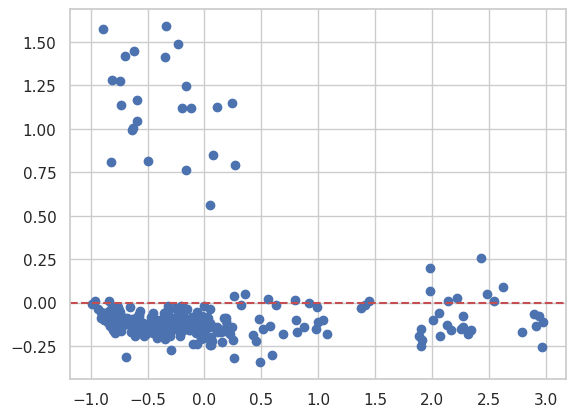

In [ ]:
residuals = np.subtract(Y_test_std, Y_pred.reshape(-1))

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
X_features = ['age2', 'owbysmok', 'smoker_yes', 'children']
Y_features = ['charges']

print(X_features)

X = imp_medical_cost_df[X_features].values
Y = imp_medical_cost_df[Y_features].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

sc_X = StandardScaler().fit(X)
sc_Y = StandardScaler().fit(Y)

X_train_std = sc_X.transform(X_train)
X_test_std = sc_X.transform(X_test)
Y_train_std = sc_Y.transform(Y_train)
Y_test_std = sc_Y.transform(Y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train_std, Y_train_std)

Y_pred = model.predict(X_test_std)
print(Y_pred.shape)

['age2', 'owbysmok', 'smoker_yes', 'children']
(335, 1)


In [ ]:
mse = metrics.mean_squared_error(Y_test_std, Y_pred)
r2 = metrics.r2_score(Y_test_std, Y_pred)
print(f'MSE: {mse.round(4)}\t R2: {r2.round(4)}')

MSE: 0.0987	 R2: 0.8964


In [ ]:
model.coef_ = model.coef_.reshape(-1)

In [ ]:
Y_test_std = Y_test_std.reshape(-1)
print(Y_test_std.shape, X_test_std.shape)
print('================ Summary ================')
stats.summary(model, X_test_std, Y_test_std, X_features)

(335,) (335, 4)
================ Summary ================
Residuals:
    Min     1Q  Median     3Q    Max
-1.9694 0.0771  0.1095 0.1323 0.3647


Coefficients:
            Estimate  Std. Error  t value  p value
_intercept  0.000000    0.017189   0.0000  1.00000
age2        0.312359    0.017667  17.6802  0.00000
owbysmok    0.512180    0.022280  22.9885  0.00000
smoker_yes  0.436095    0.020888  20.8775  0.00000
children    0.067407    0.017322   3.8913  0.00012
---
R-squared:  0.89638,    Adjusted R-squared:  0.89512
F-statistic: 713.64 on 4 features


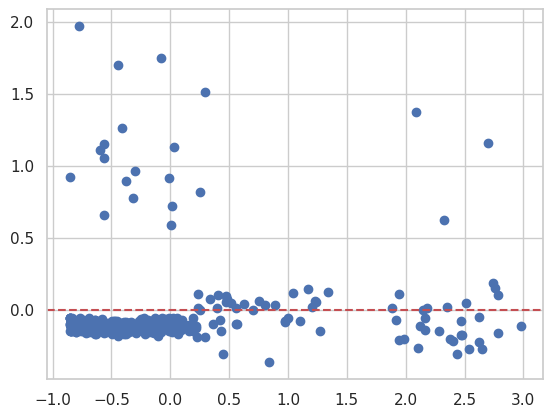

In [ ]:
residuals = np.subtract(Y_test_std, Y_pred.reshape(-1))

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()